# **AISaturdays Ocean Proximity Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial del curso de Deep Learning.

En este ejercicio trataremos de predecir la proximidad del océano con respecto a un conjunto de viviendas.

**Enlaces:**
- AISaturdays Deep Learning [temario clase 1](https://app.eduflow.com/courses/d4d36f90-f65e-4ede-b8f3-16f498ce3a33/flows/98016aaa-4e29-428f-a8f9-d5d9477d7274/activities/d9f00e62-0403-4a21-bdae-c6a3ea2984e5).
- Ejercicio Kaggle: https://www.kaggle.com/camnugent/california-housing-prices

**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: *Pandas, MatPlotLib, Numpy, Scikit-learn, Keras*.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Modelo de redes neuronales*" para procesar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción y evitar overfitting.


¡Empecemos!

#1. Importación de librerías


*Descargaremos* las herramientas que vamos a utilizar.
Para ejecutar cada celda(caja), pulsa el play de la izquierda o **Ctrl + Enter**.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

#2. Dataset
![texto alternativo](https://i.imgur.com/TMvhIbd.png)

### Obtener el dataset y previsualizar la información del dataset.

¡Nuestra tabla! Para poder visualizar y limpiar los datos convertiremos el archivo CSV.

Los datos se almacenarán en un dataframe llamado **df**.

In [0]:
# Sólo con una línea de código
df = pd.read_csv("housing.csv", sep=",")

1. Tu turno. Muestra los primeros valores del archivo CSV para hacernos una idea del contenido de la tabla con el código: df.head()


---

In [0]:
# Sólo con una línea de código
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Variables

* **longitude:** Valor longitude de la coordenada.
* **latitude:** Valor latitude de la coordenada.
* **housing_median_age:** Edad media de las viviendas de esta zona.
* **total_rooms:** Total de habitaciones.
* **total_bedrooms:** Total de camas.
* **population:** Población en esta zona. Importante denotar que también es un valor total.
* **households:** Viviendas en esta zona. Importante denotar que también es un valor total.
* **median_income:** Salario medio de las personas de esta zona.
* **median_house_value:** Valor medio de la vivienda de esta zona.
* **ocean_proximity:**  ¡El resultado! Significa la proximidad del océano con respecto a las viviendas de esta zona. Si nos fijamos, este campo contiene valores de cadena (etiquetas) para determinar la proximidad.



### Analizar dataset:

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

2. Utiliza la función .describe() para analizar la distribución de los datos


---

In [0]:
# Sólo con una línea de código
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


Visualicemos el contenido para hacernos una idea de la distribución de las viviendas por población y precio.

*   Es la zona de California, y al suroeste donde terminan los círculos, comieza el océano.
![California](https://california.azureedge.net/cdt/CAgovPortal/images/Uploads/menu-living.jpg)
*   El precio se indica con color rojo para las viviendas más caras.
*   Las viviendas más cercanas al océano se encuentran por lo tanto en la costa de California.




<Figure size 720x504 with 0 Axes>

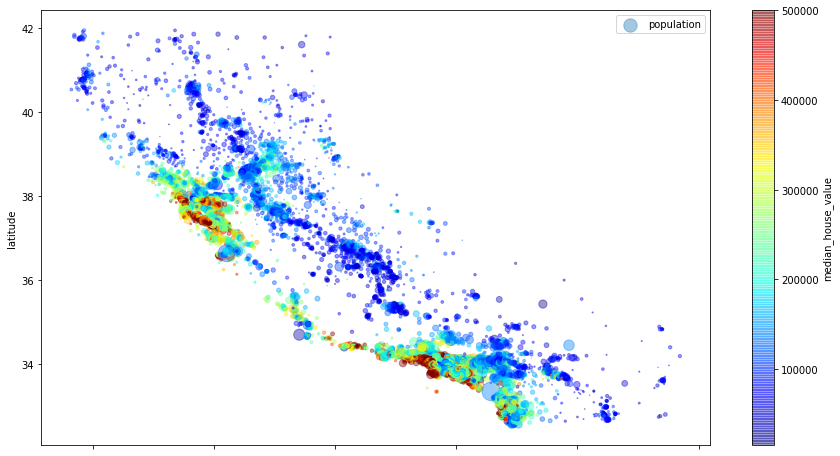

In [0]:
# Ejecutar el siguiente código
plt.figure(figsize=(10,7))
plotter = df.copy()
plotter.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=plotter["population"]/100, label="population", figsize=(15,8), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, )
plt.legend()

### Limpiar y normalizar la información del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

En este apartado se pretende corregir y mejorar información en el dataset que pueda faltar, sea inconsistente o no sea correcta.

Este paso es necesario para mejorar cualquier predicción futura que se realice con el dataset.

Existen diferentes técnicas para corregir y mejorar la calidad e integridad de información de nuestro dataset. 

Como futura lectura, recomendamos el siguiente enlace con [técnicas de mejora del dato](https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data).



3. Muestra el sumatorio de los valores nulos del dataset: df.isnull()...
[Documentación](https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe)


---

In [0]:
# Sólo con una línea de código
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

4. Elimina las filas que tengan valores a 0: df.dropna(...) [Documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---

In [0]:
# Sólo con una línea de código
df = df.dropna(axis=0)

### Analizar relaciones de la información del dataset

5. ¿Cual de estas variables está relacionada con la proxímidad del océano y cúal no? ¿Están relacionadas entre sí? **Explícalo a continuación**

---


*   **Explicalo aquí



---

Crear una matriz de correlación visual. [Pista](https://datascienceplus.com/visualize-correlation-matrices-in-python/)

6. Crea una matriz de correlación visual usando .corr()


---

In [0]:
# Dos líneas de código
corrm = df.corr()
corrm.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.924616,-0.109357,0.0454802,0.069608,0.10027,0.0565128,-0.0155502,-0.0453982
latitude,-0.924616,1,0.0118991,-0.0366668,-0.0669828,-0.108997,-0.0717742,-0.0796263,-0.144638
housing_median_age,-0.109357,0.0118991,1,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.0454802,-0.0366668,-0.360628,1,0.93038,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.0669828,-0.320451,0.93038,1,0.877747,0.979728,-0.00772285,0.0496862
population,0.10027,-0.108997,-0.295787,0.857281,0.877747,1,0.907186,0.00508662,-0.0252997
households,0.0565128,-0.0717742,-0.302768,0.918992,0.979728,0.907186,1,0.0134339,0.0648935
median_income,-0.0155502,-0.0796263,-0.118278,0.197882,-0.00772285,0.00508662,0.0134339,1,0.688355
median_house_value,-0.0453982,-0.144638,0.106432,0.133294,0.0496862,-0.0252997,0.0648935,0.688355,1


! Fíjate en todas posibles feature de la tabla de arriba que indican "**valores  totales**". (Pista: algunas de ellas no llevan el prefijo *total_* )

Estas features de totales nos indican los valores en una zona concreta de un grupo de viviendas. Para mejorar la predicción de nuestro modelo, nos conviene obtener los valores individuales por vivienda.

Los datasets no suelen ser perfectos, hay datos incompletos e incorrectos que reducen la eficiencia del modelo. Por ello necesitamos limpiarlo. [Pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf)

7. ¿Qué features están agrupadas por totales? ¿Con qué feature se agrupan y tienen más relación?

---

In [0]:
Features = 'total_... ' #@param {type:"string"}
Razon = 'total_rooms es el total de habitaciones para un conjunto de viviendas..' #@param {type:"string"}



8. De las feature agrupadas por totales, obtén las feature invididuales dividiéndolas por las que las agrupa, y añádelas al dataframe
---

In [0]:
# Tres líneas de código
df['nroom']   = df['total_rooms']    / df['households']
df['nbed']    = df['total_bedrooms'] / df['households']
df['npeople'] = df['population']     / df['households']

9. Elimina del dataset las feature de totales agrupadas, elimina también households
---

In [0]:
# Sólo con una línea de código
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis = 1, inplace = True)

10. Crea de nuevo una matriz de correlación visual usando .corr() para ver las nuevas feature añadidas y su correlación


---

In [0]:
# Dos líneas de código
corrm = df.corr()
corrm.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,median_income,median_house_value,nroom,nbed,npeople
longitude,1,-0.924616,-0.109357,-0.0155502,-0.0453982,-0.0273068,0.0134016,0.00230388
latitude,-0.924616,1,0.0118991,-0.0796263,-0.144638,0.106423,0.070025,0.00252238
housing_median_age,-0.109357,0.0118991,1,-0.118278,0.106432,-0.153031,-0.0779176,0.0132582
median_income,-0.0155502,-0.0796263,-0.118278,1,0.688355,0.325307,-0.0622989,0.0188943
median_house_value,-0.0453982,-0.144638,0.106432,0.688355,1,0.151344,-0.0467395,-0.0236394
nroom,-0.0273068,0.106423,-0.153031,0.325307,0.151344,1,0.848616,-0.00487253
nbed,0.0134016,0.070025,-0.0779176,-0.0622989,-0.0467395,0.848616,1,-0.00617882
npeople,0.00230388,0.00252238,0.0132582,0.0188943,-0.0236394,-0.00487253,-0.00617882,1


! Fíjate como ahora al haber procesado y quitado las feature de totales, hemos eliminado algunas correlaciones y la matriz nos muestra correlaciones más coherentes que nos ayudarán a mejorar la predicción de nuestro modelo.



13. Obtén los valores únicos de la feature de la que queremos obtener la predicción (ocean_proximity)


---

In [0]:
# Dos líneas de código
oceanp_types = np.unique(df['ocean_proximity'])
oceanp_types

array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

14. Explica qué ves en los valores anteriores. 


---

*   Explica aquí qué ves en los valores anteriores que deba mejorarse




---

15. Mejora el dataframe con el análisis anterior


---

In [0]:
# Sólo con una línea de código
df = df[df.ocean_proximity != 'ISLAND']

### Normalizar las feature para nuestro modelo

![texto alternativo](https://i.imgur.com/o7YvGRe.png)


Ahora deberemos proceder a normalizar el resto de variables para que la escala de valores entre ellas sea similar y facilite el procesamiento a nuestro modelo y se logre mejorar la predicción (*Feature Scaling*).
Este paso es fundamental antes de entrenar nuestro modelo.

Puesto que la **función de activación** de nuestro modelo será '**softmax**', cuyos valores son de una escala entre -1 a 1, debemos normalizar las feature en este intervalo. [Pista](https://books.google.es/books?id=M5RRDwAAQBAJ&pg=PA137&lpg=PA137&dq=scaler.fit_transform+values.reshape&source=bl&ots=zzDuEQUdQR&sig=ACfU3U1NPGvTLq46zc-pJwcexE3wGKHQPw&hl=es&sa=X&ved=2ahUKEwi1qtPZ9MDnAhXdDWMBHc-MB0UQ6AEwDXoECAgQAQ#v=onepage&q=scaler.fit_transform%20values.reshape&f=false)

16. Normaliza las feature a la escala de softmax y añádelas al dataframe.


---

In [0]:
# Seis líneas de código (cómo mínimo)
scaler = preprocessing.StandardScaler()
df['longitude'] = scaler.fit_transform(df['longitude'].values.reshape(-1,1))
df['latitude'] = scaler.fit_transform(df['latitude'].values.reshape(-1,1))
df['housing_median_age'] = scaler.fit_transform(df['housing_median_age'].values.reshape(-1,1))
df['median_income'] = scaler.fit_transform(df['median_income'].values.reshape(-1,1))
df['median_house_value'] = scaler.fit_transform(df['median_house_value'].values.reshape(-1,1))


17. Utiliza la función .describe() para analizar la distribución de los datos


---

In [0]:
# Sólo con una línea de código
df.describe(include='all')

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,nroom,nbed,npeople
count,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,20433,20433.000000,20433.000000,20433.000000
unique,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,9034,NaN,NaN,NaN
mean,-3.337466e-15,6.980827e-16,-7.584704e-16,3.832505e-16,-1.025841e-16,NaN,5.431344,1.097062,3.071533
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,NaN,2.482946,0.476104,10.438269
min,-2.385447e+00,-1.447937e+00,-2.194584e+00,-1.775054e+00,-1.662139e+00,NaN,0.846154,0.333333,0.692308
25%,-1.112692e+00,-7.972780e-01,-8.444662e-01,-6.884113e-01,-7.568419e-01,NaN,4.441441,1.006029,2.429032
50%,5.393926e-01,-6.428050e-01,2.913923e-02,-1.762077e-01,-2.353266e-01,NaN,5.230769,1.048889,2.817582
75%,7.789699e-01,9.768213e-01,6.644886e-01,4.595713e-01,5.010323e-01,NaN,6.052381,1.099631,3.281513


# 3. Modelo redes neuronales

El modelo de [redes neuronales](https://pathmind.com/wiki/neural-network) es una serie de algoritmos que logran reconocer patrones y correlaciones en un conjunto de datos a través de un proceso que simula el funcionamiento del cerebro con la finalidad de determinar predicciones que puedan interesarnos.

En Deep Learning uno de los usos más frecuentes del modelo de redes neuronales es el caso de análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).



**Ejemplo genérico de Red Neuronal**

![texto alternativo](https://pathmind.com/images/wiki/perceptron_node.png)

**Ejemplo de Red Neuronal Clasificador con función de activación SoftMax**

![Modelo](https://i.imgur.com/wcOwh5O.png)


**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.
- Detectar partes del cuerpo en imágenes o gestos.
- Detectar voces, transcripciones, textos..

**Objetivo**
- En este reto, queremos lograr **clasificar** aquellas viviendas según a la cercanía que estén del océano. Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"
![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un modelo de red neuronal con Keras:
  - Tipo de modelo: [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *Sequential*
  - Añadir 7 capas Dense.
  - La primera capa densa llevará seteada el número de features con las que se entrena el modelo, sin contar con la que queremos averiguar.
  - Las seis primeras capas llevarán la función de activación 'relu'.
  - La última capa llevará la función de activación 'softmax'.
- Compilar el modelo con:
  - Los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
  - Función de activación: 'softmax'. [Pista](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax?hl=es-419)
  - Función de pérdida: 'categorical_crossentropy'. [Pista](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)
  - Función de optimización: 'adam'. [Pista](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
- Entrenar el modelo con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento y los datos de validación.
- Determinar las conclusiones de los resultados obtenidos en el modelo.

Creación del modelo de redes neuronales

18. Crea el set de datos de entrenamiento y validación necesarios para nuestro modelo

---

In [0]:
# Crea X , que sea igual al dataframe menos la feature que queremos averiguar.
# Sólo una línea de código
X = df.drop(['ocean_proximity'],axis=1)

# Crea y , con un LabelEncoder para pasar a enteros los valores que tiene la feature que queremos averiguar
# Dos lineas de código
labenc = preprocessing.LabelEncoder()
y = labenc.fit_transform(df['ocean_proximity'])

# Crea el set de datos de entrenamiento y validación.
# Sólo una línea de código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Convierte y_train y y_test al formato que se necesita par entrenar nuestro modelo con: np_utils.to_categorical
num_classes = len(np.unique(y))
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

19. Crea y compila el modelo como se indican en los pasos de implementación descritos anteriormente

---

In [0]:
# Importar librerías keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Crear el modelo secuencial
# Sólo una línea de código
model = Sequential()

# Añadir 7 capas Dense con sus propiedades como se indica en la implementación
# Siete líneas de código
model.add(Dense(1024, input_dim=8, activation='relu'))
model.add(Dense(500,  activation='relu'))
model.add(Dense(200,  activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compilar el modelo como se indica en la implementacióbn
# Sólo una línea de código
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

20. Explica los siguientes conceptos
---
- ¿Por qué se ha utilizado el tipo de modelo 'Sequential'
- ¿Qué valor debe tener input_dim y que feature no se debe contabilizar?
- ¿Qué función de activación se ha seteado en la última capa?
- ¿Por qué se ha elegido esa función de activación en la última capa?
- ¿Por qué se ha elegido 'categorical_crossentropy' en la función de pérdida?
- ¿Qué significa la terminología de función de optimización?


*Escribe aquí las respuestas

In [0]:
# Visualizar el resultado de la compilación del modelo
# Sólo una línea de código
model.summary()

21. Entrena finalmente el modelo con los parámetros necesarios: X_train, Y_train, epochs=???, batch_size=???, validation_data=(X_test,Y_test)
---
- El set de entrenamiento Y_train debe esta previamente convertido al formato que necesita el modelo. No se debe usar directamente el obtenido de train_test_split(...)
- Prueba con diferentes epochs (iteraciones): 10, 100, 500, 1000.
- Prueba con diferentes batch_size: 10, 200, 1000, 100000.

---

In [0]:
# Sólo con una línea de código
history = model.fit(X_train, Y_train, epochs=500, batch_size=200, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 13686 samples, validate on 6742 samples
Epoch 1/500





13686/13686 [==============================] - 10s 767us/step - loss: 0.7708 - acc: 0.6900 - val_loss: 0.5501 - val_acc: 0.7846
Epoch 2/500
13686/13686 [==============================] - 1s 39us/step - loss: 0.4781 - acc: 0.8114 - val_loss: 0.4206 - val_acc: 0.8223
Epoch 3/500
13686/13686 [==============================] - 1s 39us/step - loss: 0.3648 - acc: 0.8468 - val_loss: 0.3255 - val_acc: 0.8629
Epoch 4/500
13686/13686 [==============================] - 1s 39us/step - loss: 0.3488 - acc: 0.8570 - val_loss: 0.3589 - val_acc: 0.8526
Epoch 5/500
13686/13686 [==============================] - 1s 37us/step - loss: 0.3219 - acc: 0.8663 - val_loss: 0.3025 - val_acc: 0.8741
Epoch 6/500
13686/13686 [==============================] - 1s 41us/step - loss: 0.2901 - acc: 0.8774 - val_loss: 0.2814 - val_acc: 0.8849
Epoch 7/500
13686/1

In [0]:
# Escribe aquí las otras pruebas de código


22. Explica qué ocurre con diferentes epochs y batch_size
---
- ¿Qué ocurre con demasiados epochs? [Pista](#https://stats.stackexchange.com/questions/384593/why-too-many-epochs-will-cause-overfitting)
- ¿Qué ocurre con un valor demasiado grande de batch_size?


---

*Escribe aquí las respuestas

Función auxiliar para ver la gráfica de la ejecución del modelo

In [0]:
# FUNCIÓN AUXILIAR, EJECUTAR, NO MODIFICAR.
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

23. Imprime la gráfica de la ejecución del modelo
---


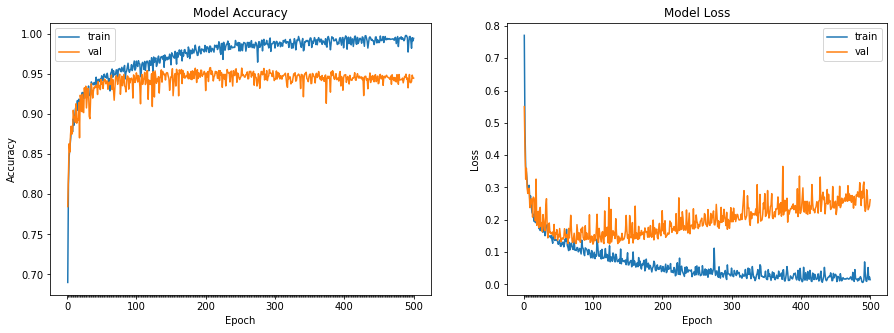

In [0]:
# Sólo con una línea de código
plot_model_history(history)

24. Analiza y explica qué indica la gráfica del modelo
---
- Explica la gráfica de Accuracy
- Explica la gráfica de Loss
- *Escribe aquí las respuestas

# 4. Mejorar la predicción

Mejorar la predicción y resultado de nuestro modelo es posible:

*   Aumentar el dataset o mejorar la calidad de los datos existentes.
*   **Optimizar hyperparámetros** de nuestro conjunto de datos y de nuestro modelo.

A continuación se pretende mejorar la predicción mediante la "*optimización de hyperparámetros*".

25. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del set de datos de entrenamiento y validación: random_state
---

In [0]:
# Escribe aquí el código

*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.


26. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del modelo: Nº de parámetros de las capas Densas
---

In [0]:
# Escribe aquí el código

*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.